<a href="https://colab.research.google.com/github/Javiour2003/Compute_Tasks/blob/main/Jatin_Jadhav_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree 

[Dataset](https://drive.google.com/file/d/1EeorIZFT2JSM_KeFgnkwD_TqafeuoxNB/view?usp=sharing)

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [2]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


**Loading Data**

In [3]:

# load dataset
df = pd.read_csv("/content/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df['Outcome'].nunique()

2

**Feature Selection**

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [7]:
#split dataset in features and target variable
x= df.iloc[:,0:8]
y= df.iloc[:,8]

**Splitting Data**

In [9]:
#train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

**Building Decision Tree Model**

create a Decision Tree Model using Scikit-learn with default parametes

In [11]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred=model.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0])

**Evaluating Model**

In [12]:
# Model Accuracy, how often is the classifier correct?
print(metrics.accuracy_score(y_test,y_pred))

0.71875


In [13]:
print('Training set score: {:.4f}'.format(model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.7188


**Visualizing Decision Trees**

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.



In [14]:
!pip install graphviz
!pip install six
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


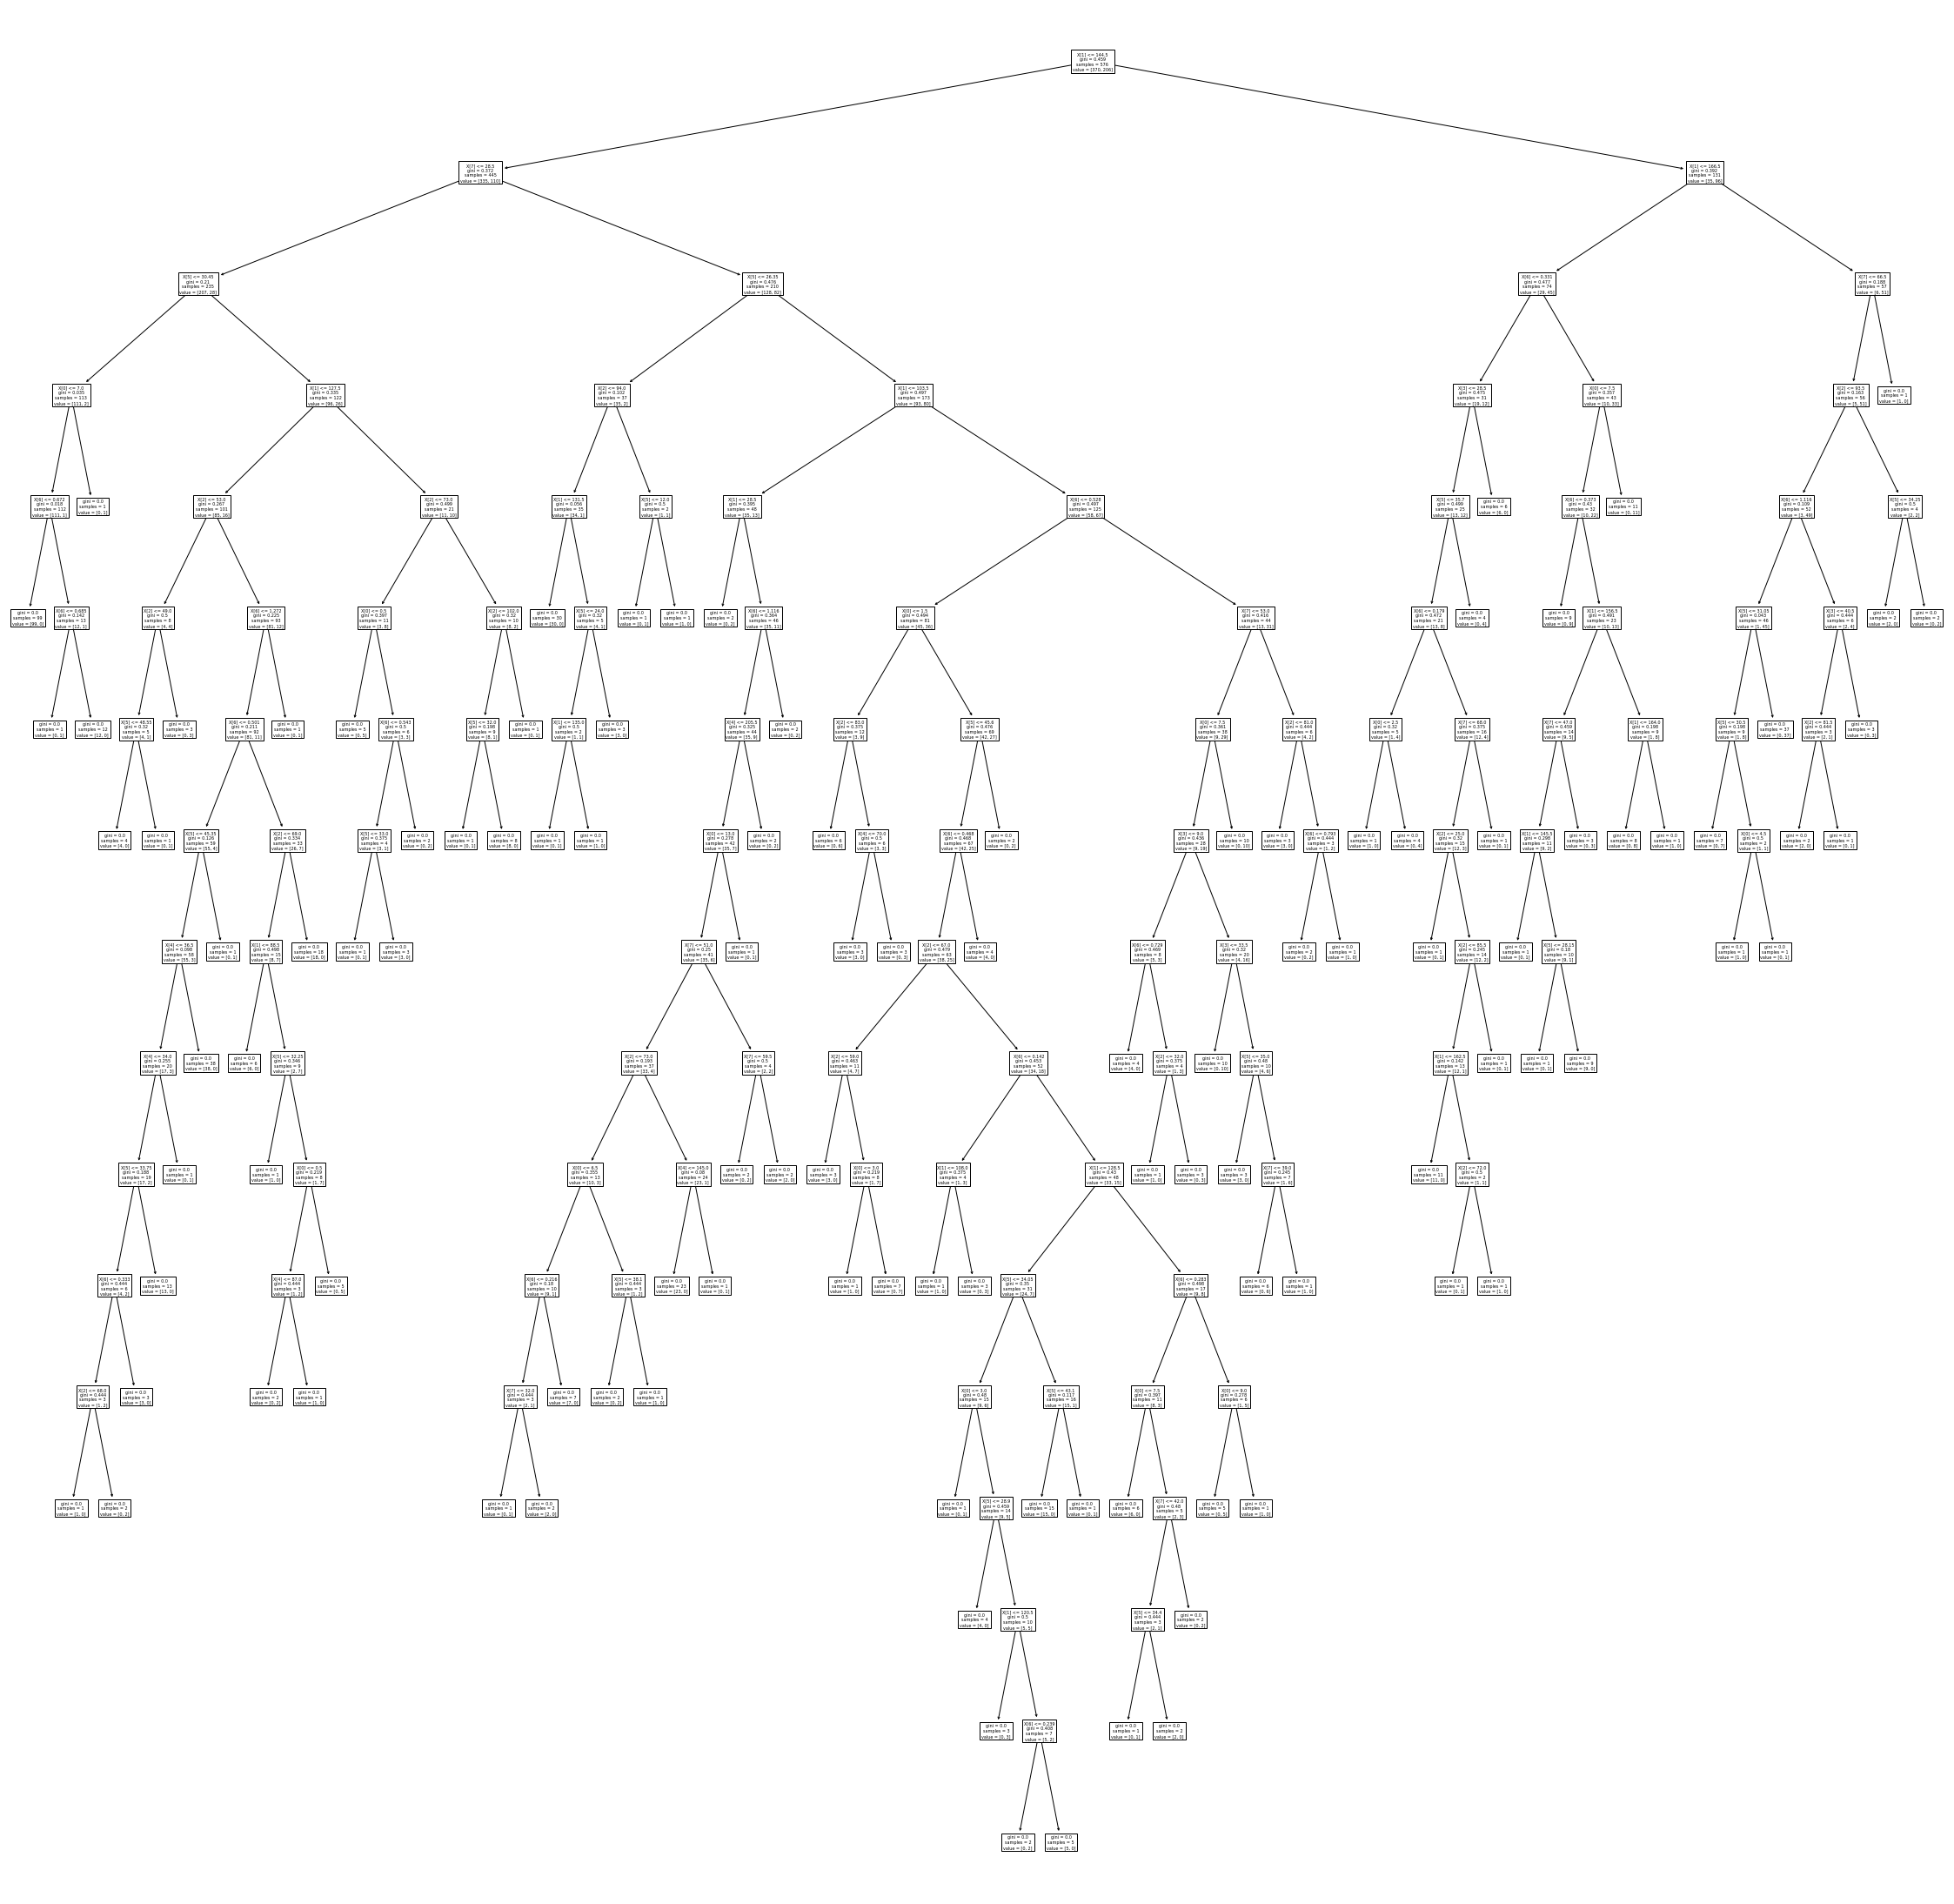

In [15]:
from sklearn import tree
import matplotlib.pyplot as plt
import pydotplus
import graphviz

plt.figure(figsize=(40,40))
tree.plot_tree(model.fit(x_train, y_train)); 


**Optimizing Decision Tree Performance**

Try out different parameter values for optimizing the accuracy on max_deapth ,criterion etc

In [16]:
# Create Decision Tree classifer object
model_ent = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)
# Train Decision Tree Classifer
model_ent.fit(x_train,y_train)
#Predict the response for test dataset
y_pred_ent=model_ent.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print(metrics.accuracy_score(y_test,y_pred_ent))

0.7916666666666666


In [17]:
print('Training set score: {:.4f}'.format(model_ent.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(model_ent.score(x_test, y_test)))

Training set score: 0.8420
Test set score: 0.7917


**Visualizing Decision Trees**

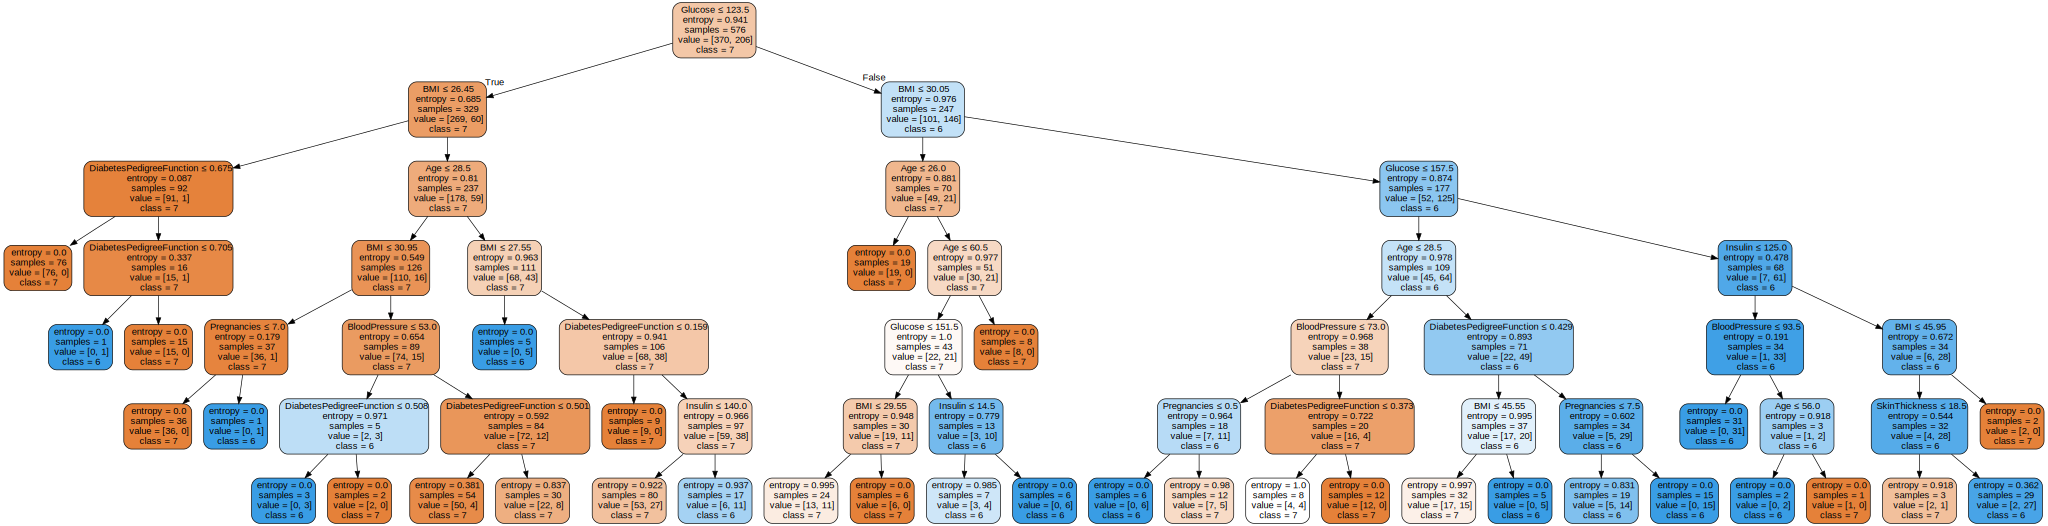

In [13]:
dot_data = tree.export_graphviz(model_ent, out_file=None, 
                              feature_names=x_train.columns,  
                              class_names=str(y_train),  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

**Implement Random Forest**

In [20]:
from sklearn.ensemble import RandomForestClassifier


In [47]:
# Create RandomForest Tree classifer object
rfc = RandomForestClassifier(n_estimators=145,random_state=0,max_depth=3)
# Train RandomForest Tree Classifer
rfc.fit(x_train,y_train)
#Predict the response for test dataset
y_pred_rfc = rfc.predict(x_test)
#Model Accuracy, how often is the classifier correct?
print(metrics.accuracy_score(y_test,y_pred_rfc))

0.796875


In [55]:
print(rfc.score(x_train,y_train))
print(rfc.score(x_test,y_test))
print(metrics.classification_report(y_test,y_pred))

0.7986111111111112
0.796875
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       130
           1       0.56      0.60      0.58        62

    accuracy                           0.72       192
   macro avg       0.68      0.69      0.68       192
weighted avg       0.72      0.72      0.72       192



If the model overfitting try out different way to fix it!!

### All the best!!! I hope you will Enjoy the Task!